In [1]:
# Import some pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import urllib.request 
import os
data_file = "airfoil.csv"
if not os.path.exists(data_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat", "airfoil.csv")
    
af_data = pd.read_csv('airfoil.csv', header=None, delimiter="\t")

headers =  ["Frequency (Hz)","Angle of Attack (degrees)","Chord Length (m)","Free-stream Velocity (m/s)","Suction Side Displacement thickness (m)","Scaled Sound Pressure Level (dB)"]
af_data.columns = headers

af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


### Part 1

In [3]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [4]:
def Category(x):
    if x <= 120  :
        return "Safe"
    else:
        return "Not Safe"

In [5]:
af_data['Categorized Sound Level'] = af_data.iloc[:,5]
af_data['Categorized Sound Level'] = af_data['Categorized Sound Level'].map(Category)

In [6]:
af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB),Categorized Sound Level
0,800,0.0,0.3048,71.3,0.002663,126.201,Not Safe
1,1000,0.0,0.3048,71.3,0.002663,125.201,Not Safe
2,1250,0.0,0.3048,71.3,0.002663,125.951,Not Safe
3,1600,0.0,0.3048,71.3,0.002663,127.591,Not Safe
4,2000,0.0,0.3048,71.3,0.002663,127.461,Not Safe


In [7]:
af_data["Categorized Sound Level"].unique()

array(['Not Safe', 'Safe'], dtype=object)

In [8]:
# Select the desired features, and the desired labels
X_1 = af_data[['Frequency (Hz)']].values
Y_1 = af_data['Categorized Sound Level']

# Fit the data to the Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_1, Y_1)

LogisticRegression()

In [9]:
# Choose some convenient bounds for the x-axis
max_Frequency = max(af_data[['Frequency (Hz)']].values)+1
min_Frequency = min(af_data[['Frequency (Hz)']].values)-1

# Plot 1000 points along the logistic curve to see 
X_1_compare = np.linspace(min_Frequency, max_Frequency, 1000).reshape(-1, 1)
y_1_compare_probability = log_reg.predict_proba(X_1_compare)

#  Set decision boundary to be used in figure below.  Currently set at p = 0.5
decision_boundary1 = X_1_compare[y_1_compare_probability[:, 1] >= 0.5][0]

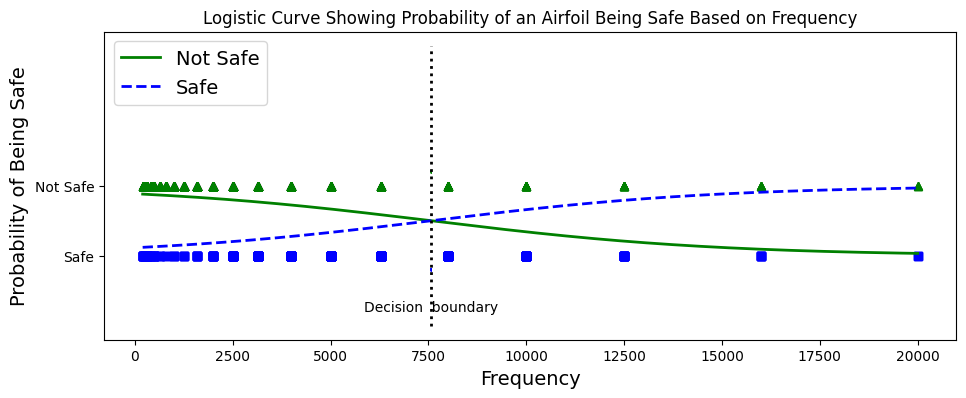

In [10]:
#  Choose size of figure
plt.figure(figsize=(11, 4))

# plot points corresponding to Iris-setosa and Iris-versicolor
plt.plot(X_1[Y_1=="Safe"], Y_1[Y_1=="Safe"], "bs")
plt.plot(X_1[Y_1=="Not Safe"], Y_1[Y_1=="Not Safe"], "g^")

# Plot the logistic curve; second curve is for comparison
plt.plot(X_1_compare, y_1_compare_probability[:, 0], "g-", linewidth=2, label="Not Safe")
plt.plot(X_1_compare, y_1_compare_probability[:, 1], "b--", linewidth=2, label="Safe")

# Plot the decision boundary 
plt.plot([decision_boundary1, decision_boundary1], [-1, 3], "k:", linewidth=2)
plt.text(decision_boundary1+0.02, -0.8, "Decision  boundary", fontsize=10, color="k", ha="center")


plt.arrow(decision_boundary1[0], -0.2, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary1[0], 1.2, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# Label plot
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Probability of Being Safe', fontsize=14)
plt.title('Logistic Curve Showing Probability of an Airfoil Being Safe Based on Frequency');
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [11]:
y_pred1 = log_reg.predict(X_1)
actually_safe = np.sum(Y_1 == "Safe")
labeled_safe = np.sum(y_pred1 == "Safe")
print(f"Actually Safe: {actually_safe} Predicted Safe: {labeled_safe}")

actually_notsafe = np.sum(Y_1 == "Not Safe")
labeled_notsafe = np.sum(y_pred1 == "Not Safe")

print(f"Actually Not Safe: {actually_notsafe} Predicted Not Safe: {labeled_notsafe}")

Actually Safe: 360 Predicted Safe: 138
Actually Not Safe: 1143 Predicted Not Safe: 1365


In [12]:
#from sklearn import metrics and call it metrics.
import sklearn.metrics as metrics
cm1 = metrics.confusion_matrix(Y_1, y_pred1)
print(cm1)

[[1083   60]
 [ 282   78]]


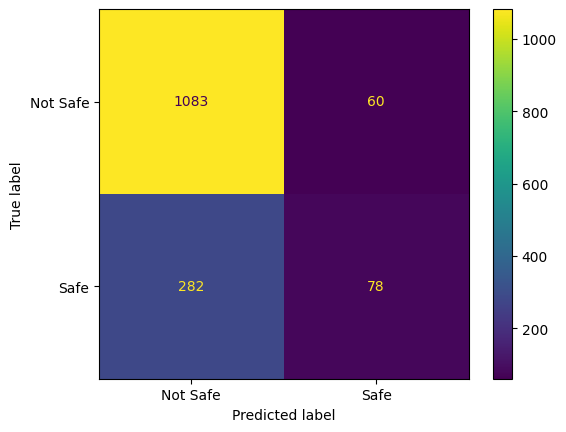

In [13]:
cnf1 = metrics.confusion_matrix(Y_1, y_pred1)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf1, display_labels=["Not Safe", "Safe"])
disp.plot()
plt.show()

In [14]:
print("Accuracy:", metrics.accuracy_score(Y_1, y_pred1))
print("Precision:", metrics.precision_score(Y_1, y_pred1, pos_label="Safe"))
print("Recall:", metrics.recall_score(Y_1, y_pred1, pos_label="Not Safe"))

Accuracy: 0.7724550898203593
Precision: 0.5652173913043478
Recall: 0.94750656167979


In [15]:
import statsmodels.api as sm

logit_model=sm.Logit(Y_1 == "Safe",sm.add_constant(X_1))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.484430
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     Categorized Sound Level   No. Observations:                 1503
Model:                               Logit   Df Residuals:                     1501
Method:                                MLE   Df Model:                            1
Date:                     Tue, 09 May 2023   Pseudo R-squ.:                  0.1201
Time:                             11:07:34   Log-Likelihood:                -728.10
converged:                            True   LL-Null:                       -827.44
Covariance Type:                 nonrobust   LLR p-value:                 4.036e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0482      0.099    -20.707      0.000      -2.242  

In [16]:
X_2 = af_data[['Angle of Attack (degrees)']].values


log_reg.fit(X_2, Y_1)

LogisticRegression()

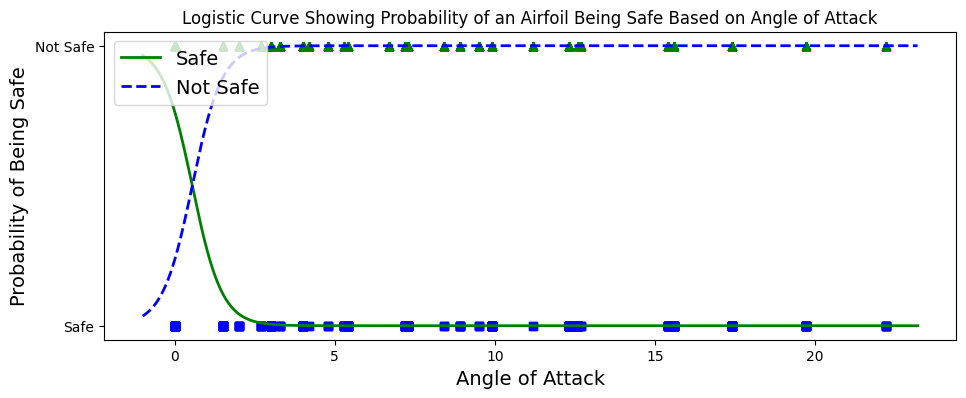

In [36]:
# Choose some convenient bounds for the x-axis
max_AoA = max(af_data[['Angle of Attack (degrees)']].values)+1
min_AoA = min(af_data[['Angle of Attack (degrees)']].values)-1

# Plot 1000 points along the logistic curve to see 
X_2_compare = np.linspace(min_AoA, max_AoA, 1000).reshape(-1, 1)
y_2_compare_probability = log_reg.predict_proba(X_2_compare)

#  Set decision boundary to be used in figure below.  Currently set at p = 0.5
#decision_boundary2 = X_2_compare[y_2_compare_probability[:, 1] >= 0.5][0]

#  Choose size of figure
plt.figure(figsize=(11, 4))

# plot points corresponding to Iris-setosa and Iris-versicolor
plt.plot(X_2[Y_1=="Safe"], Y_1[Y_1=="Safe"], "bs")
plt.plot(X_2[Y_1=="Not Safe"], Y_1[Y_1=="Not Safe"], "g^")

# Plot the logistic curve; second curve is for comparison
plt.plot(X_2_compare, y_2_compare_probability[:, 0], "g-", linewidth=2, label="Safe")
plt.plot(X_2_compare, y_2_compare_probability[:, 1], "b--", linewidth=2, label="Not Safe")

# Plot the decision boundary 
#plt.plot([decision_boundary2, decision_boundary2], [-1, 3], "k:", linewidth=2)
#plt.text(decision_boundary2+0.02, -0.8, "Decision  boundary", fontsize=10, color="k", ha="center")


#plt.arrow(decision_boundary2[0], -0.2, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
#plt.arrow(decision_boundary2[0], 1.2, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# Label plot
plt.xlabel('Angle of Attack', fontsize=14)
plt.ylabel('Probability of Being Safe', fontsize=14)
plt.title('Logistic Curve Showing Probability of an Airfoil Being Safe Based on Angle of Attack');
plt.legend(loc="upper left", fontsize=14)
plt.show()

Actually Safe: 360 Predicted Safe: 0
Actually Not Safe: 1143 Predicted Not Safe: 1503


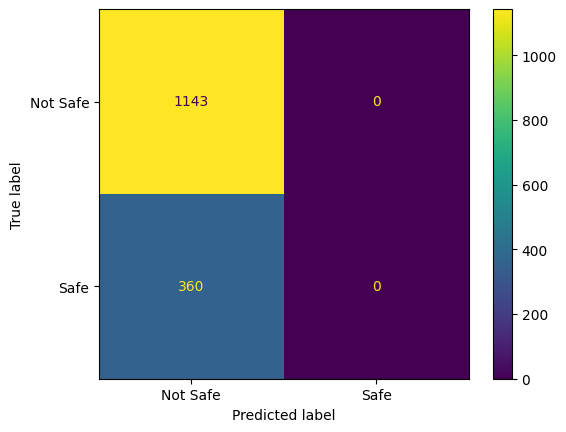

In [18]:
y_pred2 = log_reg.predict(X_2)
actually_safe = np.sum(Y_1 == "Safe")
labeled_safe = np.sum(y_pred2 == "Safe")
print(f"Actually Safe: {actually_safe} Predicted Safe: {labeled_safe}")

actually_notsafe = np.sum(Y_1 == "Not Safe")
labeled_notsafe = np.sum(y_pred2 == "Not Safe")

print(f"Actually Not Safe: {actually_notsafe} Predicted Not Safe: {labeled_notsafe}")


cnf2 = metrics.confusion_matrix(Y_1, y_pred2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf2, display_labels=["Not Safe", "Safe"])
disp.plot()
plt.show()

In [19]:
logit_model=sm.Logit(Y_1 == "Safe",sm.add_constant(X_2))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.539929
         Iterations 5
                              Logit Regression Results                             
Dep. Variable:     Categorized Sound Level   No. Observations:                 1503
Model:                               Logit   Df Residuals:                     1501
Method:                                MLE   Df Model:                            1
Date:                     Tue, 09 May 2023   Pseudo R-squ.:                 0.01925
Time:                             11:07:35   Log-Likelihood:                -811.51
converged:                            True   LL-Null:                       -827.44
Covariance Type:                 nonrobust   LLR p-value:                 1.659e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5658      0.099    -15.887      0.000      -1.759  

It should be noted that this model chose to label everything as unsafe. That's not really helpful.

In [20]:
X_3 = af_data[['Chord Length (m)']].values

log_reg.fit(X_3, Y_1)

LogisticRegression()

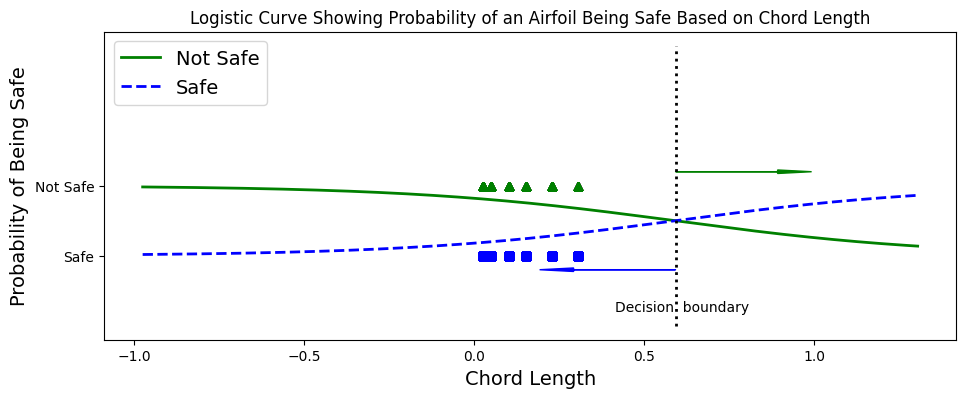

In [21]:
# Choose some convenient bounds for the x-axis
max_CL = max(af_data[['Chord Length (m)']].values)+1
min_CL = min(af_data[['Chord Length (m)']].values)-1

# Plot 1000 points along the logistic curve to see 
X_3_compare = np.linspace(min_CL, max_CL, 1000).reshape(-1, 1)
y_3_compare_probability = log_reg.predict_proba(X_3_compare)

#  Set decision boundary to be used in figure below.  Currently set at p = 0.5
decision_boundary3 = X_3_compare[y_3_compare_probability[:, 1] >= 0.5][0]

#  Choose size of figure
plt.figure(figsize=(11, 4))

# plot points corresponding to Iris-setosa and Iris-versicolor
plt.plot(X_3[Y_1=="Safe"], Y_1[Y_1=="Safe"], "bs")
plt.plot(X_3[Y_1=="Not Safe"], Y_1[Y_1=="Not Safe"], "g^")

# Plot the logistic curve; second curve is for comparison
plt.plot(X_3_compare, y_3_compare_probability[:, 0], "g-", linewidth=2, label="Not Safe")
plt.plot(X_3_compare, y_3_compare_probability[:, 1], "b--", linewidth=2, label="Safe")

# Plot the decision boundary 
plt.plot([decision_boundary3, decision_boundary3], [-1, 3], "k:", linewidth=2)
plt.text(decision_boundary3+0.02, -0.8, "Decision  boundary", fontsize=10, color="k", ha="center")


plt.arrow(decision_boundary3[0], -0.2, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary3[0], 1.2, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# Label plot
plt.xlabel('Chord Length', fontsize=14)
plt.ylabel('Probability of Being Safe', fontsize=14)
plt.title('Logistic Curve Showing Probability of an Airfoil Being Safe Based on Chord Length');
plt.legend(loc="upper left", fontsize=14)
plt.show()

Actually Safe: 360 Predicted Safe: 0
Actually Not Safe: 1143 Predicted Not Safe: 1503


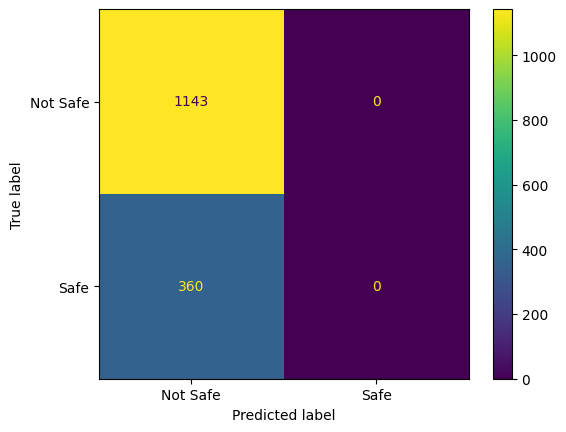

In [22]:
y_pred3 = log_reg.predict(X_3)
actually_safe = np.sum(Y_1 == "Safe")
labeled_safe = np.sum(y_pred3 == "Safe")
print(f"Actually Safe: {actually_safe} Predicted Safe: {labeled_safe}")

actually_notsafe = np.sum(Y_1 == "Not Safe")
labeled_notsafe = np.sum(y_pred3 == "Not Safe")

print(f"Actually Not Safe: {actually_notsafe} Predicted Not Safe: {labeled_notsafe}")


cnf3 = metrics.confusion_matrix(Y_1, y_pred3)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf3, display_labels=["Not Safe", "Safe"])
disp.plot()
plt.show()

In [23]:
logit_model=sm.Logit(Y_1 == "Safe",sm.add_constant(X_3))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.539809
         Iterations 5
                              Logit Regression Results                             
Dep. Variable:     Categorized Sound Level   No. Observations:                 1503
Model:                               Logit   Df Residuals:                     1501
Method:                                MLE   Df Model:                            1
Date:                     Tue, 09 May 2023   Pseudo R-squ.:                 0.01947
Time:                             11:07:36   Log-Likelihood:                -811.33
converged:                            True   LL-Null:                       -827.44
Covariance Type:                 nonrobust   LLR p-value:                 1.377e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6799      0.115    -14.584      0.000      -1.906  

This model also just assumed everything was not safe. That is not good.

In [24]:
X_4 = af_data[['Free-stream Velocity (m/s)']].values


log_reg.fit(X_4, Y_1)

LogisticRegression()

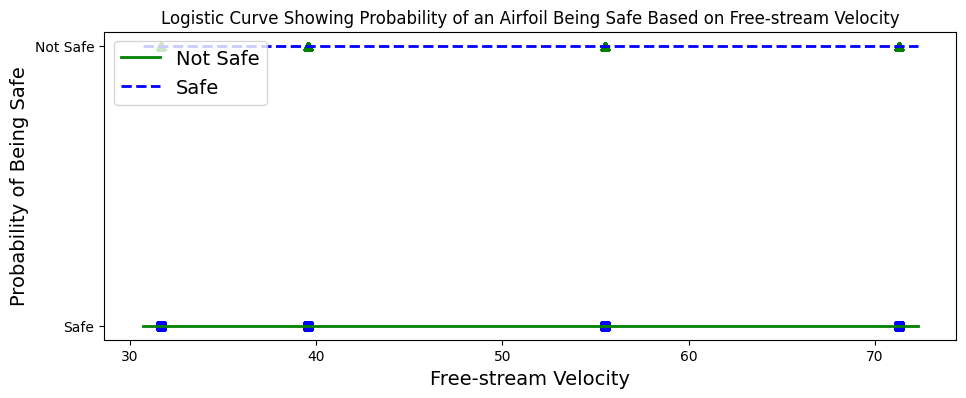

In [37]:
max_FSV = max(af_data[['Free-stream Velocity (m/s)']].values)+1
min_FSV = min(af_data[['Free-stream Velocity (m/s)']].values)-1

# Plot 1000 points along the logistic curve to see 
X_4_compare = np.linspace(min_FSV, max_FSV, 1000).reshape(-1, 1)
y_4_compare_probability = log_reg.predict_proba(X_4_compare)

#  Set decision boundary to be used in figure below.  Currently set at p = 0.5
#decision_boundary4 = X_4_compare[y_4_compare_probability[:, 1] >= 0.5][0]

#  Choose size of figure
plt.figure(figsize=(11, 4))

# plot points corresponding to Iris-setosa and Iris-versicolor
plt.plot(X_4[Y_1=="Safe"], Y_1[Y_1=="Safe"], "bs")
plt.plot(X_4[Y_1=="Not Safe"], Y_1[Y_1=="Not Safe"], "g^")

# Plot the logistic curve; second curve is for comparison
plt.plot(X_4_compare, y_4_compare_probability[:, 0], "g-", linewidth=2, label="Not Safe")
plt.plot(X_4_compare, y_4_compare_probability[:, 1], "b--", linewidth=2, label="Safe")

# Plot the decision boundary 
#plt.plot([decision_boundary3, decision_boundary4], [-1, 3], "k:", linewidth=2)
#plt.text(decision_boundary3+0.02, -0.8, "Decision  boundary", fontsize=10, color="k", ha="center")


#plt.arrow(decision_boundary4[0], -0.2, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
#plt.arrow(decision_boundary4[0], 1.2, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# Label plot
plt.xlabel('Free-stream Velocity', fontsize=14)
plt.ylabel('Probability of Being Safe', fontsize=14)
plt.title('Logistic Curve Showing Probability of an Airfoil Being Safe Based on Free-stream Velocity');
plt.legend(loc="upper left", fontsize=14)
plt.show()

Actually Safe: 360 Predicted Safe: 0
Actually Not Safe: 1143 Predicted Not Safe: 1503


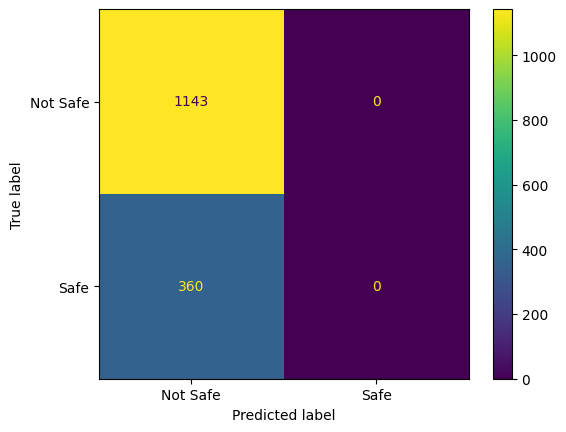

In [26]:
y_pred4 = log_reg.predict(X_4)
actually_safe = np.sum(Y_1 == "Safe")
labeled_safe = np.sum(y_pred4 == "Safe")
print(f"Actually Safe: {actually_safe} Predicted Safe: {labeled_safe}")

actually_notsafe = np.sum(Y_1 == "Not Safe")
labeled_notsafe = np.sum(y_pred4 == "Not Safe")

print(f"Actually Not Safe: {actually_notsafe} Predicted Not Safe: {labeled_notsafe}")


cnf4 = metrics.confusion_matrix(Y_1, y_pred4)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf4, display_labels=["Not Safe", "Safe"])
disp.plot()
plt.show()

In [27]:
logit_model=sm.Logit(Y_1 == "Safe",sm.add_constant(X_4))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.548068
         Iterations 5
                              Logit Regression Results                             
Dep. Variable:     Categorized Sound Level   No. Observations:                 1503
Model:                               Logit   Df Residuals:                     1501
Method:                                MLE   Df Model:                            1
Date:                     Tue, 09 May 2023   Pseudo R-squ.:                0.004468
Time:                             11:07:37   Log-Likelihood:                -823.75
converged:                            True   LL-Null:                       -827.44
Covariance Type:                 nonrobust   LLR p-value:                  0.006546
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6201      0.205     -3.030      0.002      -1.021  

This model also assumes everything is not safe. Even worse, the model isn't statistically significant.

In [28]:
X_5 = af_data[['Suction Side Displacement thickness (m)']].values


log_reg.fit(X_5, Y_1)

LogisticRegression()

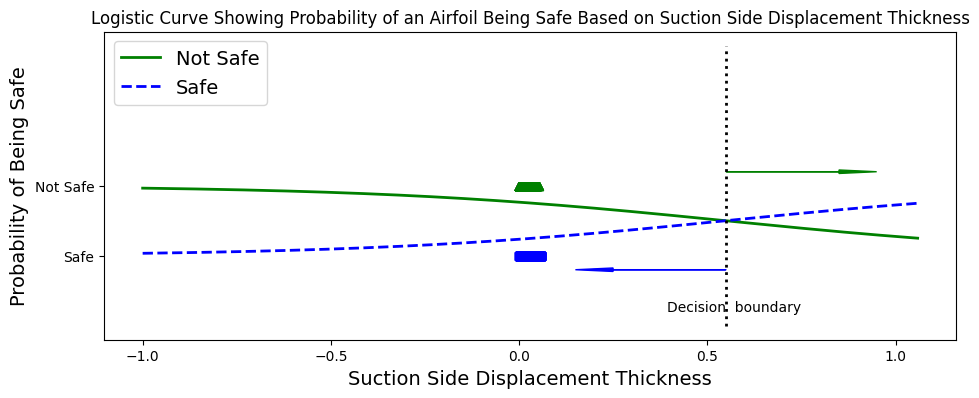

In [29]:
max_SSDT = max(af_data[['Suction Side Displacement thickness (m)']].values)+1
min_SSDT = min(af_data[['Suction Side Displacement thickness (m)']].values)-1

# Plot 1000 points along the logistic curve to see 
X_5_compare = np.linspace(min_SSDT, max_SSDT, 1000).reshape(-1, 1)
y_5_compare_probability = log_reg.predict_proba(X_5_compare)

#  Set decision boundary to be used in figure below.  Currently set at p = 0.5
decision_boundary5 = X_5_compare[y_5_compare_probability[:, 1] >= 0.5][0]

#  Choose size of figure
plt.figure(figsize=(11, 4))

# plot points corresponding to Iris-setosa and Iris-versicolor
plt.plot(X_5[Y_1=="Safe"], Y_1[Y_1=="Safe"], "bs")
plt.plot(X_5[Y_1=="Not Safe"], Y_1[Y_1=="Not Safe"], "g^")

# Plot the logistic curve; second curve is for comparison
plt.plot(X_5_compare, y_5_compare_probability[:, 0], "g-", linewidth=2, label="Not Safe")
plt.plot(X_5_compare, y_5_compare_probability[:, 1], "b--", linewidth=2, label="Safe")

# Plot the decision boundary 
plt.plot([decision_boundary5, decision_boundary5], [-1, 3], "k:", linewidth=2)
plt.text(decision_boundary5+0.02, -0.8, "Decision  boundary", fontsize=10, color="k", ha="center")


plt.arrow(decision_boundary5[0], -0.2, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary5[0], 1.2, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# Label plot
plt.xlabel('Suction Side Displacement Thickness', fontsize=14)
plt.ylabel('Probability of Being Safe', fontsize=14)
plt.title('Logistic Curve Showing Probability of an Airfoil Being Safe Based on Suction Side Displacement Thickness');
plt.legend(loc="upper left", fontsize=14)
plt.show()

Actually Safe: 360 Predicted Safe: 0
Actually Not Safe: 1143 Predicted Not Safe: 1503


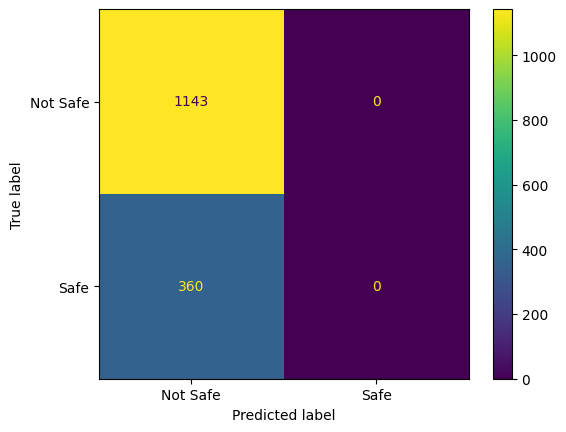

In [30]:
y_pred5 = log_reg.predict(X_5)
actually_safe = np.sum(Y_1 == "Safe")
labeled_safe = np.sum(y_pred5 == "Safe")
print(f"Actually Safe: {actually_safe} Predicted Safe: {labeled_safe}")

actually_notsafe = np.sum(Y_1 == "Not Safe")
labeled_notsafe = np.sum(y_pred5 == "Not Safe")

print(f"Actually Not Safe: {actually_notsafe} Predicted Not Safe: {labeled_notsafe}")


cnf5 = metrics.confusion_matrix(Y_1, y_pred5)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf5, display_labels=["Not Safe", "Safe"])
disp.plot()
plt.show()

In [31]:
logit_model=sm.Logit(Y_1 == "Safe",sm.add_constant(X_5))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.518423
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     Categorized Sound Level   No. Observations:                 1503
Model:                               Logit   Df Residuals:                     1501
Method:                                MLE   Df Model:                            1
Date:                     Tue, 09 May 2023   Pseudo R-squ.:                 0.05832
Time:                             11:07:38   Log-Likelihood:                -779.19
converged:                            True   LL-Null:                       -827.44
Covariance Type:                 nonrobust   LLR p-value:                 8.900e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6896      0.087    -19.500      0.000      -1.859  

Again, we run into the same issue.

### Part 2

In [32]:
from sklearn.model_selection import train_test_split

X = X_1
y = Y_1

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=13)
print(y_train.value_counts())
print(y_test.value_counts())

Categorized Sound Level
Not Safe    859
Safe        268
Name: count, dtype: int64
Categorized Sound Level
Not Safe    284
Safe         92
Name: count, dtype: int64


In [33]:
from sklearn.metrics import accuracy_score

# Model 1 with stratified sample
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_m1=model1.predict(X_test)
acc_m1=accuracy_score(y_pred_m1,y_test)

print(acc_m1)

0.75


In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

5

In [35]:
scores = []
 
# using regression to get predicted data
model1=LogisticRegression()

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model1.fit(X_train, y_train)
    pred = model1.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores)

[0.773936170212766, 0.7805851063829787, 0.776595744680851, 0.7805851063829787, 0.7712765957446809]


I didn't do as much in this lab as I typically do, but when it comes to the paper and the poster, I will most likely do logistic regression with the other input variables as well. I'll also most likely normalize the data in case it makes the logistic regression figure look cleaner, but you will see the final product in the paper or poster presentation.

Anyway, as for the technique that was used, we utilized logistic regression. It takes the data and looks at a variable and uses the binary output (in the case of my data, safe or not safe) and tries to determine a logistic graph that helps determine whether it's more likely for a given input to result in one of the two outcomes that we care about. Then the confusion matrix can be used to determine the reliability of the logistic curve.

The next technique utilized is splitting the data into training and test sets. It's a great method for testing which technique may handle the data the best or most accurately. We only used it with logistic regression, but we can use the training data to help train other methods as well, such as logistic regression, linear regression, K-nearest neighbors, random forest, etc.